In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
train = pd.read_csv("../data/processed_train.csv", sep="&")
test = pd.read_csv("../data/processed_test.csv", sep="&")

## Shape and columns

In [3]:
print(f"Train columns: {train.columns}\nTest columns: {test.columns}")

Train columns: Index(['text', 'label'], dtype='object')
Test columns: Index(['text', 'label'], dtype='object')


In [4]:
print(f"Train shape: {train.shape}\nTest shape: {test.shape}")

Train shape: (23253, 2)
Test shape: (9966, 2)


## Label distributions

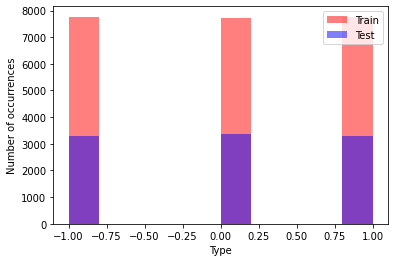

In [7]:
plt.hist(train["label"], color="red", alpha=0.5, label="Train")
plt.hist(test["label"], color="blue", alpha=0.5, label="Test")
plt.xlabel("Type")
plt.ylabel("Number of occurrences")
plt.legend()

We have approximately the same number of items for each class

## Distributions of training examples by word and character counts

In [8]:
for df in train, test:
    df["num_characters"] = df["text"].apply(lambda x: len(x))
    df["num_words"] = df["text"].apply(lambda x: len(x.split(" ")))

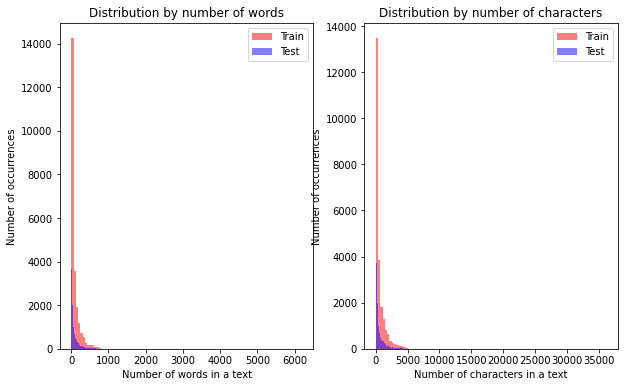

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

axes[0].hist(train["num_words"], bins=100, color="red", alpha=0.5, label="Train")
axes[0].hist(test["num_words"], bins=100, color="blue", alpha=0.5, label="Test")
axes[0].set_title("Distribution by number of words")
axes[0].set_xlabel("Number of words in a text")
axes[0].set_ylabel("Number of occurrences")
axes[0].legend()

axes[1].hist(train["num_characters"], bins=100, color="red", alpha=0.5, label="Train")
axes[1].hist(test["num_characters"], bins=100, color="blue", alpha=0.5, label="Test")
axes[1].set_title("Distribution by number of characters")
axes[1].set_xlabel("Number of characters in a text")
axes[1].set_ylabel("Number of occurrences")
axes[1].legend()

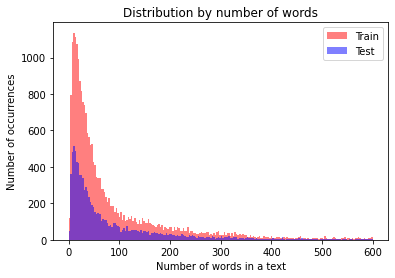

In [13]:
plt.hist(train["num_words"], bins=200, color="red", alpha=0.5, label="Train", range=[0, 600])
plt.hist(test["num_words"], bins=200, color="blue", alpha=0.5, label="Test", range=[0, 600])
plt.title("Distribution by number of words")
plt.xlabel("Number of words in a text")
plt.ylabel("Number of occurrences")
plt.legend()

## Conclusion
* Classes have roughly the same number of samples.
* The majority of samples in both train and test dataset have less than 200 words
    * It can be considered for setting up the max number of token in a BERT model
